In [2]:
import matlab.engine
eng = matlab.engine.start_matlab()
import matplotlib.pyplot as plt
import os
import cv2
import math as mt
import numpy as np

In [14]:
#path to the diffraction images collected in pump and probe fashion

main_path = r'D:\PhD Experimental data\Electron diffraction\2020-02-25_PIRL\HP_2_402mW\Diffraction\10us'
folder_name = 'Backup for img#{}'
file_name_probe = 'frame {x} for img#{y} 2020-2-25 11x0.5sec Probe 15000{z:02}fs.spe'
file_name_pp = 'frame {x} for img#{y} 2020-2-25 11x0.5sec Pump+Probe 15000{z:02}fs.spe'

In [15]:
#reading the .spe files corresponding to pump and probe data and storing it as multidimensional array 
probe_data_tmp = []
pp_data_tmp = []
k=0
for i in range(1,6):
    folder_path = os.path.join(main_path,folder_name.format(i))
    
    print('Reading from folder {}'.format(i))
    print(folder_path)
    
    for j in range(1,6):
        #reading images
        probe_file = os.path.join(folder_path,file_name_probe.format(x=j,y=i,z=k))
        print(probe_file)
        pp_file = os.path.join(folder_path,file_name_pp.format(x=j,y=i,z=k))
        print(pp_file)
        #storing the images as numpy arrays 
        probe_data_tmp.append(np.array(eng.ReadsspeIndividual(probe_file),dtype=np.uint16))
        pp_data_tmp.append(np.array(eng.ReadsspeIndividual(pp_file),dtype=np.uint16))
    k=k+1

Reading from folder 1
D:\PhD Experimental data\Electron diffraction\2020-02-25_PIRL\HP_2_402mW\Diffraction\10us\Backup for img#1
D:\PhD Experimental data\Electron diffraction\2020-02-25_PIRL\HP_2_402mW\Diffraction\10us\Backup for img#1\frame 1 for img#1 2020-2-25 11x0.5sec Probe 1500000fs.spe
D:\PhD Experimental data\Electron diffraction\2020-02-25_PIRL\HP_2_402mW\Diffraction\10us\Backup for img#1\frame 1 for img#1 2020-2-25 11x0.5sec Pump+Probe 1500000fs.spe
D:\PhD Experimental data\Electron diffraction\2020-02-25_PIRL\HP_2_402mW\Diffraction\10us\Backup for img#1\frame 2 for img#1 2020-2-25 11x0.5sec Probe 1500000fs.spe
D:\PhD Experimental data\Electron diffraction\2020-02-25_PIRL\HP_2_402mW\Diffraction\10us\Backup for img#1\frame 2 for img#1 2020-2-25 11x0.5sec Pump+Probe 1500000fs.spe
D:\PhD Experimental data\Electron diffraction\2020-02-25_PIRL\HP_2_402mW\Diffraction\10us\Backup for img#1\frame 3 for img#1 2020-2-25 11x0.5sec Probe 1500000fs.spe
D:\PhD Experimental data\Electron di

D:\PhD Experimental data\Electron diffraction\2020-02-25_PIRL\HP_2_402mW\Diffraction\10us\Backup for img#5\frame 4 for img#5 2020-2-25 11x0.5sec Probe 1500004fs.spe
D:\PhD Experimental data\Electron diffraction\2020-02-25_PIRL\HP_2_402mW\Diffraction\10us\Backup for img#5\frame 4 for img#5 2020-2-25 11x0.5sec Pump+Probe 1500004fs.spe
D:\PhD Experimental data\Electron diffraction\2020-02-25_PIRL\HP_2_402mW\Diffraction\10us\Backup for img#5\frame 5 for img#5 2020-2-25 11x0.5sec Probe 1500004fs.spe
D:\PhD Experimental data\Electron diffraction\2020-02-25_PIRL\HP_2_402mW\Diffraction\10us\Backup for img#5\frame 5 for img#5 2020-2-25 11x0.5sec Pump+Probe 1500004fs.spe


In [16]:
np.shape(probe_data_tmp)

(25, 900, 900)

In [17]:
#Clean the data
#in each backup folders there are 5 shots which needs to be averaged and the arked files needs to be removed
median_pp =[]
median_probe=[]
mean_pp = []
mean_probe = []
for i in range(24):
    median_pp.append(np.median(pp_data_tmp[i]))
    median_probe.append(np.median(probe_data_tmp[i]))
    mean_pp.append(np.mean(pp_data_tmp[i]))
    mean_probe.append(np.mean(probe_data_tmp[i]))
print("Pump+probe meadian")
print(median_pp)
print('Probe median')
print(median_probe)
print("Pump+probe mean")
print(mean_pp)
print('Probe mean')
print(mean_probe)

Pump+probe meadian
[354.0, 354.0, 355.0, 355.0, 356.0, 355.0, 355.0, 355.0, 355.0, 355.0, 355.0, 355.0, 355.0, 355.0, 355.0, 355.0, 355.0, 355.0, 355.0, 355.0, 355.0, 355.0, 355.0, 355.0]
Probe median
[352.0, 353.0, 353.0, 353.0, 353.0, 353.0, 353.0, 353.0, 353.0, 353.0, 353.0, 353.0, 353.0, 353.0, 353.0, 353.0, 353.0, 353.0, 353.0, 353.0, 353.0, 353.0, 353.0, 353.0]
Pump+probe mean
[360.03464197530866, 359.67295802469135, 361.3433074074074, 361.0049864197531, 361.64238518518516, 361.1200456790123, 361.35715308641977, 360.61274444444444, 361.41526666666664, 360.5518851851852, 360.07684197530864, 360.6229345679012, 360.41559506172837, 360.6434765432099, 361.22374938271605, 360.1798851851852, 360.1795074074074, 361.1361592592593, 360.3097148148148, 360.5897061728395, 360.2730345679012, 360.94634444444443, 360.644587654321, 360.69718518518516]
Probe mean
[357.92657037037037, 358.32842222222223, 359.06808641975306, 358.4973703703704, 358.99333827160496, 359.0707950617284, 359.2157703703703

In [18]:
std_pp = np.std(median_pp)
avg_pp = np.average(median_pp)
std_prob = np.std(median_probe)
avg_prob = np.average(median_probe)

print('Average pump+probe pixel intensity = {}'.format(avg_pp))
print('Average probe pixel intensity = {}'.format(avg_prob))
print(std_prob)

Average pump+probe pixel intensity = 354.9583333333333
Average probe pixel intensity = 352.9583333333333
0.19982631347136331


In [19]:
i=0
deleted_file_pp = []
deleted_file_prob = []

while i<len(pp_data_tmp):
    if np.median(pp_data_tmp[i]) > avg_pp+std_pp:
        deleted_file_pp.append(pp_data_tmp[i])
        pp_data_tmp.pop(i)
        probe_data_tmp.pop(i)
    i=i+1

j=0
i=0
while j<len(probe_data_tmp):
    if np.median(probe_data_tmp[i]) > avg_pp+std_pp:
        deleted_file_prob.append(probe_data_tmp[i])
        probe_data_tmp.pop(i)
        pp_data_tmp.pop(i)
    j=j+1

deleted pp file #1
deleted probe file #0


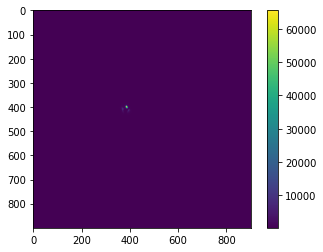

In [20]:
print('deleted pp file #{}'.format(len(deleted_file_pp)))
print('deleted probe file #{}'.format(len(deleted_file_prob)))
np.shape(deleted_file_pp)
plt.imshow(deleted_file_pp[0])
plt.colorbar()

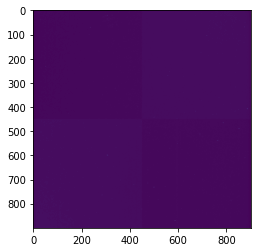

In [21]:
background_file = r'D:\PhD Experimental data\Electron diffraction\Main ones\2020-02-18_PIRL\BG\img#1 2020-2-18 11x0.5sec.spe'
bg = np.array(eng.ReadsspeIndividual(background_file),dtype=np.uint16)
plt.imshow(bg)

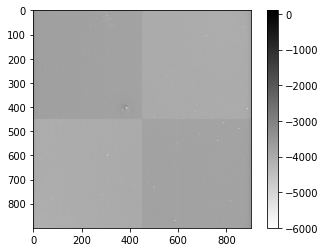

In [22]:
pp_probe = []

sum_pp = np.zeros([900,900])
for i in range(len(pp_data_tmp)):
    sum_pp = sum_pp+pp_data_tmp[i]
    
avg_pp_img = sum_pp/len(pp_data_tmp)

sum_probe = np.zeros([900,900])
for i in range(len(probe_data_tmp)):
    sum_probe = sum_probe+probe_data_tmp[i]
    
avg_pp_img = sum_pp/len(pp_data_tmp)
avg_probe_img = sum_probe/len(probe_data_tmp)

avg_pp_probe = avg_pp_img-avg_probe_img
avg_bg = np.subtract(avg_pp_probe, bg) 

plt.imshow(avg_bg, cmap = 'gray_r', vmin = -6000, vmax = 100)
plt.colorbar()

In [23]:
for i in range(len(pp_data_tmp)):
    pp_probe.append(abs(pp_data_tmp[i])-abs(probe_data_tmp[i]))
[l,x,y] = np.shape(pp_probe)
summ = np.zeros([x,y])
for i in pp_probe:
    summ = summ+i
avg = summ/len(pp_probe)

final = np.subtract(bg,avg)

new_folder = r'D:\PhD Experimental data\Electron diffraction\Analysis'
file_name = '2020-02-25_402mW_10us.png'
path_new = os.path.join(new_folder,file_name)


#from sklearn.preprocessing import scale
#final = scale(final, axis=1, with_mean=True, with_std=True, copy=True )

final *= 255.0/final.max()

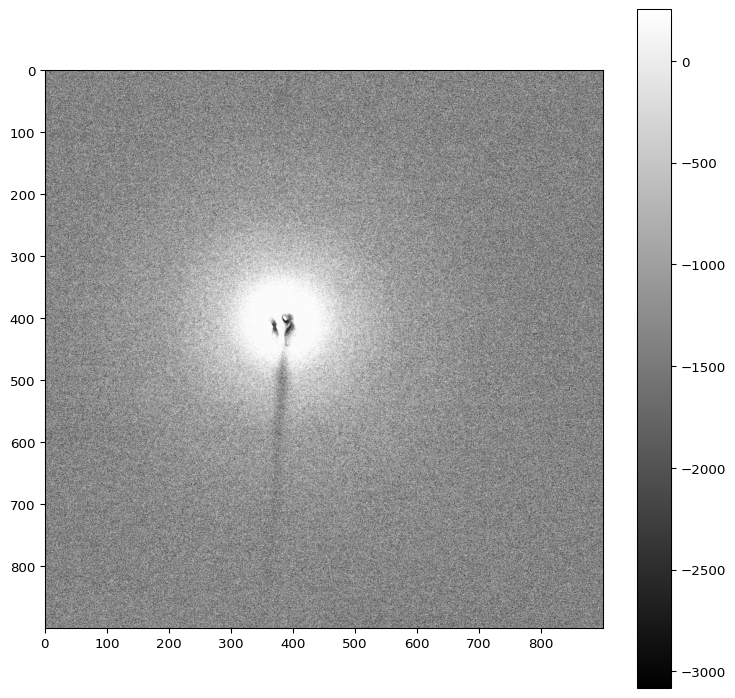

In [24]:
my_dpi = 96
plt.figure(figsize=(900/my_dpi, 900/my_dpi), dpi=my_dpi)
plt.imshow(final,cmap = 'gray')
plt.colorbar()
plt.imsave(fname = path_new,arr=final, cmap='gray', format='png')